## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from pmdarima import auto_arima

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Regression Forecast for the Last 8 Observations')
    plt.xlabel('Time')
    plt.ylabel('WTI Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Import Data

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/WTI.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,WTI,WTI_LAG1,WTI_LAG2,WTI_LAG3,WTI_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.028554,0.095448,0.084944,0.016658,-0.077023,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.095448,0.084944,0.016658,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.028554,0.095448,0.084944,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.099040,0.028554,0.095448,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.006551,-0.135538,-0.080447,0.099040,0.028554,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.198614,0.091224,0.068518,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.141561,0.198614,0.091224,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,-0.153171,0.141561,0.198614,0.015792,1.58,1.38,0.005921,1,1


## Test Importance

In [11]:
y = df['WTI']
X = df[["WTI_LAG1","WTI_LAG2","WTI_LAG3","WTI_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.159
Date:                Sat, 20 Jan 2024   Prob (F-statistic):            0.00152
Time:                        12:28:31   Log-Likelihood:                 59.495
No. Observations:                 109   AIC:                            -96.99
Df Residuals:                      98   BIC:                            -67.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prune Dataset

In [5]:
selected_columns = ["WTI","WTI_LAG1","USAGDP","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,WTI,WTI_LAG1,USAGDP,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,
1996-07-01,0.028554,0.095448,0.020675,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.012196,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.015662,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.012380,0.782759,0,0
1997-07-01,-0.006551,-0.135538,0.018502,0.041964,0,0
...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.020373,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.017477,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,0.015792,0.005921,1,1


## Simple Regressor

In [12]:
train = pruned_df[:-8]
test = pruned_df[-8:]

X_train = train[['WTI_LAG1']]
y_train = train['WTI']

X_test = test[['WTI_LAG1']]
y_test = test['WTI']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.748
Date:                Sat, 20 Jan 2024   Prob (F-statistic):              0.101
Time:                        12:30:19   Log-Likelihood:                 40.792
No. Observations:                 101   AIC:                            -77.58
Df Residuals:                      99   BIC:                            -72.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0097      0.016      0.596      0.5

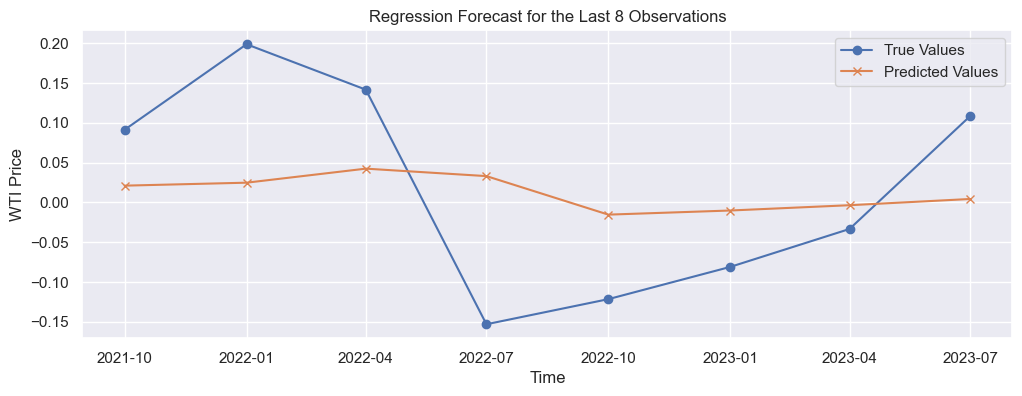

In [7]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [8]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.1051
MAPE: 89.5214 %
MSE: 0.0135
RMSE: 0.1160


### Save

In [9]:
df = pd.DataFrame({'WTI Q UR': predictions, 'Actual': y_test})
df.to_excel("WTI_Q_UR_forecast.xlsx", index=True)
df

,WTI Q UR,Actual
DATE,,
2021-10-01,0.020960,0.091224
2022-01-01,0.024689,0.198614
2022-04-01,0.042326,0.141561
2022-07-01,0.032956,-0.153171
2022-10-01,-0.015448,-0.121634
2023-01-01,-0.010268,-0.081122
2023-04-01,-0.003615,-0.033490
2023-07-01,0.004207,0.108301


In [10]:
# Open a file in write mode
with open('WTI Q UR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')

## Multiple Regressor

In [13]:
train = pruned_df[:-8]
test = pruned_df[-8:]

X_train = train[["WTI_LAG1","USAGDP","Infectious Disease Tracker"]]
y_train = train['WTI']

X_test = test[["WTI_LAG1","USAGDP","Infectious Disease Tracker"]]
y_test = test['WTI']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.443
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           0.000154
Time:                        12:31:19   Log-Likelihood:                 49.872
No. Observations:                 101   AIC:                            -91.74
Df Residuals:                      97   BIC:                            -81.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

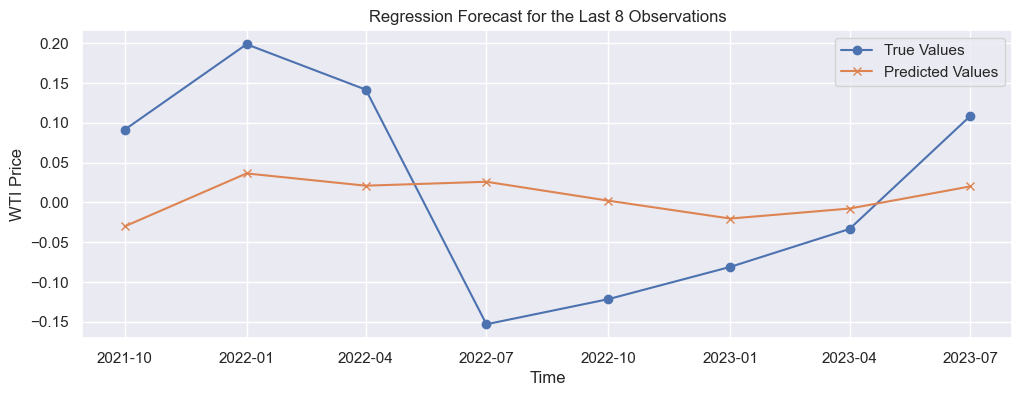

In [10]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [13]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.1102
MAPE: 93.9770 %
MSE: 0.0144
RMSE: 0.1200


### Save

In [14]:
df = pd.DataFrame({'WTI Q MR': predictions, 'Actual': y_test})
df.to_excel("WTI_Q_MR_forecast.xlsx", index=True)
df

,WTI Q MR,Actual
DATE,,
2021-10-01,-0.030215,0.091224
2022-01-01,0.036315,0.198614
2022-04-01,0.020909,0.141561
2022-07-01,0.025851,-0.153171
2022-10-01,0.002086,-0.121634
2023-01-01,-0.020375,-0.081122
2023-04-01,-0.007802,-0.033490
2023-07-01,0.019960,0.108301


In [15]:
# Open a file in write mode
with open('WTI Q MR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')